In [2]:
!pip install sentence_transformers

     |████████████████████████████████| 78 kB 3.1 MB/s 
     |████████████████████████████████| 3.1 MB 11.6 MB/s 
     |████████████████████████████████| 3.3 MB 39.8 MB/s 
     |████████████████████████████████| 1.2 MB 33.6 MB/s 
     |████████████████████████████████| 59 kB 4.7 MB/s 
     |████████████████████████████████| 895 kB 56.3 MB/s 
     |████████████████████████████████| 596 kB 51.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=fbc0bd5b3b12a48b2bac97f4840c712114580b21f9fe2f03579553c357516517
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer,models
from sklearn.decomposition import PCA
import torch
import torch.nn as nn

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Multilingual_data.csv to Multilingual_data.csv


In [5]:
import io
df = pd.read_csv(io.StringIO(uploaded['Multilingual_data.csv'].decode('utf-8')))
df

,English,German,French,Spanish
0,I have practiced piano every day for fifteen y...,Ich habe fÃ¼nfzehn Jahre lang jeden Tag Klavie...,Je pratique le piano tous les jours depuis qui...,He practicado el piano todos los dÃ­as durante...
1,What flower do you like best?,Welche Blume magst du am liebsten?,Quelle fleur prÃ©fÃ©rez-vous?,Â¿QuÃ© flor te gusta mÃ¡s?
2,Spend your time wisely and you'll always have ...,Verbringen Sie Ihre Zeit mit Bedacht und Sie w...,Passez votre temps Ã bon escient et vous en a...,Pase su tiempo sabiamente y siempre tendrÃ¡ su...
3,"If you act like a child, you will be treated a...","Wenn Sie sich wie ein Kind verhalten, werden S...","Si vous agissez comme un enfant, vous serez tr...","Si actÃºas como un niÃ±o, serÃ¡s tratado como ..."
4,What do you think she is doing now?,"Was glaubst du, macht sie jetzt?",Que pensez-vous qu'elle fait maintenant?,Â¿QuÃ© crees que estÃ¡ haciendo ella ahora?
5,I hope you finish for work on time.,"Ich hoffe, Sie sind pÃ¼nktlich zur Arbeit fertig.",J'espÃ¨re que vous finirez Ã temps pour le tr...,Espero que termines tu trabajo a tiempo.
6,Please keep your mouth closed while you eat yo...,"Bitte halten Sie den Mund geschlossen, wÃ¤hren...",Veuillez garder la bouche fermÃ©e pendant que ...,"Â¡Por favor, mantenga la boca cerrada mientras..."
7,I suppose it's different when you think about ...,"Ich nehme an, es ist anders, wenn man langfris...",Je suppose que c'est diffÃ©rent quand on y pen...,Supongo que es diferente cuando lo piensas a l...
8,A burglar broke into your house while you were...,"Ein Einbrecher ist in Ihr Haus eingebrochen, a...",Un cambrioleur est entrÃ© par effraction dans ...,Un ladrÃ³n irrumpiÃ³ en su casa mientras estab...
9,I'm sorry to have kept you waiting.,"Tut mir leid, dass ich dich habe warten lassen.",Je suis dÃ©solÃ© de vous avoir fait attendre.,Siento haberte hecho esperar.


In [6]:
embedder = SentenceTransformer('distiluse-base-multilingual-cased')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/607 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [8]:
en = embedder.encode(list(df['English'])) 
german = embedder.encode(list(df['German']))
french = embedder.encode(list(df['French']))
spanish = embedder.encode(list(df['Spanish']))

In [9]:
en.shape

(14, 512)

In [10]:
german.shape

(14, 512)

In [11]:
french.shape

(14, 512)

In [12]:
spanish.shape

(14, 512)

In [13]:
from sklearn.decomposition import PCA
def lists_to_ARRAY(a,b,c,d): 
    a_stack = np.stack(a)
    b_stack = np.stack(b)
    c_stack = np.stack(c)
    d_stack = np.stack(d)
    ARRAY = np.concatenate((a_stack,b_stack,c_stack,d_stack),axis=0)
    pca = PCA(n_components=2)
    pca_out = pca.fit_transform(ARRAY)
    return(pca_out)

In [14]:
sent_ARRAY = lists_to_ARRAY(en,german,french,spanish)

In [15]:
sent_ARRAY.shape

(56, 2)

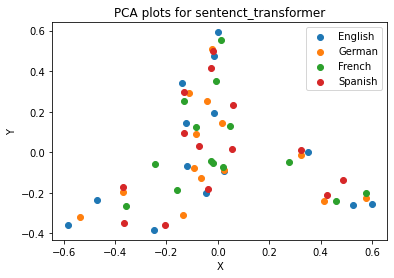

In [17]:
import matplotlib.pyplot as plt
plt.scatter(sent_ARRAY[:14,0],sent_ARRAY[:14,1],) 
plt.scatter(sent_ARRAY[14:28,0],sent_ARRAY[14:28,1])
plt.scatter(sent_ARRAY[28:42,0],sent_ARRAY[28:42,1])
plt.scatter(sent_ARRAY[42:56,0],sent_ARRAY[42:56,1])
plt.legend(['English','German','French','Spanish'])
plt.title('PCA plots for sentenct_transformer')
plt.xlabel('X')
plt.ylabel('Y');

In [31]:
eval_sent1 = [['Hi my name is Uday'], #en
             ['Hola mi nombre es uday'], #es 
             ['Hallo, mein Name ist uday'],#German
            ['انا اسمي عدي']] #Arabic

eval_sent2 = [['movie was okish but actors were great'], #en
             ['la película estaba bien pero los actores eran geniales'], #es 
             ['Film war okisch, aber die Schauspieler waren großartig'],#German
            ['الفيلم كان طيب لكن الممثلين كانوا رائعين']] #Arabic

eval_sent3 = [['Is there a way I can return the product?'], #en
             ['Hay alguna forma de devolver el producto?'], #es 
             ['Kann ich das Produkt zurückgeben?'],#German
            ['هل هناك طريقة يمكنني إرجاع المنتج؟']] #Arabic

In [32]:
from itertools import combinations 
from sklearn.metrics.pairwise import cosine_similarity
def evaluate_embeddings(eval_sent):  #Takes a list of embeddings
    
    a = embedder.encode(eval_sent[0])
    b = embedder.encode(eval_sent[1])
    c = embedder.encode(eval_sent[2])
    d = embedder.encode(eval_sent[3])
    
    sent = [a,b,c,d]
    
    
    comb = combinations(sent, 2)
    similarities = []
    for i in list(comb): 
         similarities.extend(cosine_similarity(i[0],i[1])[0])
            
    return(similarities)

In [33]:
evaluate_embeddings(eval_sent1)


[0.86416113, 0.82150817, 0.7089716, 0.9415263, 0.7528563, 0.67747664]

In [34]:
ST_1 = evaluate_embeddings(eval_sent1)
ST_2 = evaluate_embeddings(eval_sent2)
ST_3 = evaluate_embeddings(eval_sent3)


([<matplotlib.axis.XTick at 0x7f3ad4354350>,
 [Text(0, 0, "('a', 'b')"),
  Text(0, 0, "('a', 'c')"),
  Text(0, 0, "('a', 'd')"),
  Text(0, 0, "('b', 'c')"),
  Text(0, 0, "('b', 'd')"),
  Text(0, 0, "('c', 'd')")])

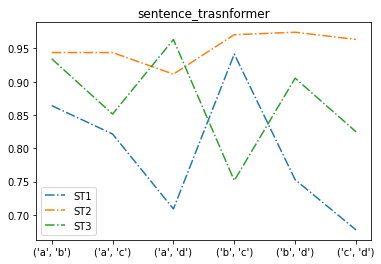

In [35]:
comb = combinations(['a','b','c','d'], 2)
import matplotlib.pyplot as plt
plt.plot(ST_1,linestyle='dashdot')
plt.plot(ST_2,linestyle='dashdot')
plt.plot(ST_3,linestyle='dashdot')
plt.legend(['ST1','ST2','ST3'])
plt.title('sentence_trasnformer')
plt.xticks(np.arange(0,6),comb)

In [36]:
en = [['Hi my name is Uday'], #en
              ['movie was okish but actors were great'],
              ['Is there a way I can return the product?']]

es = [['Hola mi nombre es Uday'], #es
             ['la película estaba bien pero los actores eran geniales'],
              ['Hay alguna forma de devolver el producto?']]

ger = [['Hallo, mein Name ist Uday'],
              ['Film war okisch, aber die Schauspieler waren großartig'],
              ['Kann ich das Produkt zurückgeben?']]
arab = [['انا اسمي عدي'],
              ['الفيلم كان طيب لكن الممثلين كانوا رائعين'],
              ['هل هناك طريقة يمكنني إرجاع المنتج؟']]

In [37]:
from itertools import combinations 
from sklearn.metrics.pairwise import cosine_similarity
def evaluate_embeddings(eval_sent):  #Takes a list of embeddings
    
    a = embedder.encode(eval_sent[0])
    b = embedder.encode(eval_sent[1])
    c = embedder.encode(eval_sent[2])
    
    
    sent = [a,b,c]
    
    
    comb = combinations(sent, 2)
    similarities = []
    for i in list(comb): 
         similarities.extend(cosine_similarity(i[0],i[1])[0])
            
    return(similarities)

In [38]:
ST_en = evaluate_embeddings(en)
ST_es = evaluate_embeddings(es)
ST_ger = evaluate_embeddings(ger)
ST_arab = evaluate_embeddings(arab)

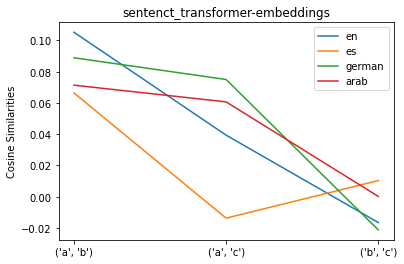

In [39]:
comb = combinations(['a','b','c'],2)
plt.plot(ST_en)
plt.plot(ST_es)
plt.plot(ST_ger)
plt.plot(ST_arab)
# plt.xlabel('Different sentence combinations')
plt.ylabel('Cosine Similarities')
plt.xticks(np.arange(0,3),comb)
plt.title('sentenct_transformer-embeddings')
plt.legend(['en','es','german','arab'])